# CS 445 Final Project - Image Morphing

## Setup and Load Images

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import Delaunay
from scipy.spatial import voronoi_plot_2d, Voronoi

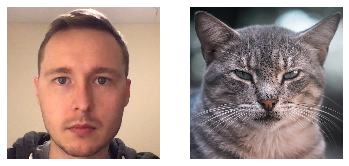

In [2]:
# Read in the source and target images
source_img = cv2.imread('./images/inputs/andrew.jpg')
target_img = cv2.imread('./images/inputs/cat.jpg')

assert source_img.shape == target_img.shape
H, W, C = source_img.shape

fix, axes = plt.subplots(1, 2)
[a.axis('off') for a in axes.ravel()]
axes[0].imshow(cv2.cvtColor(source_img, cv2.COLOR_BGR2RGB))
axes[1].imshow(cv2.cvtColor(target_img, cv2.COLOR_BGR2RGB))

## Select Corresponding Points

In [12]:
'''
Display the image and collect points clicked on the image.

Heavily referenced from UIUC CS445 MP3 utils.py in starter code.
'''
def specify_points(img):
    fig = plt.figure()
    fig.set_label('Select corresponding points in the image')
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    clicked = []
    
    def on_mouse_pressed(event):
        x = round(event.xdata)
        y = round(event.ydata)
        plt.plot(x, y, 'r+')
        clicked.append([x, y])
        
    fig.canvas.mpl_connect('button_press_event', on_mouse_pressed)
    
    return clicked

<IPython.core.display.Javascript object>


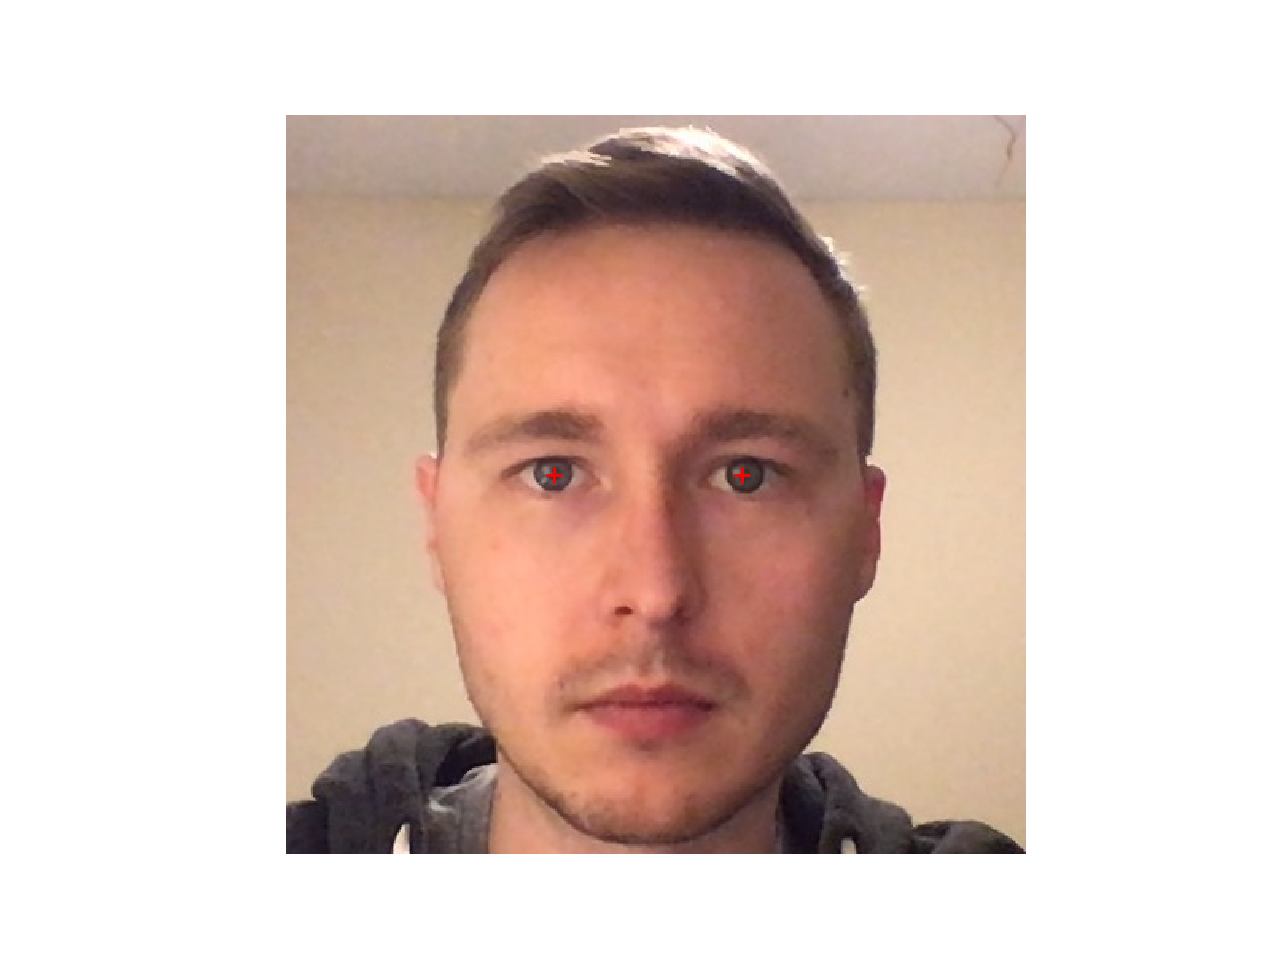

In [13]:
# Select corresponding points on the images
%matplotlib notebook
source_points = specify_points(source_img)

<IPython.core.display.Javascript object>


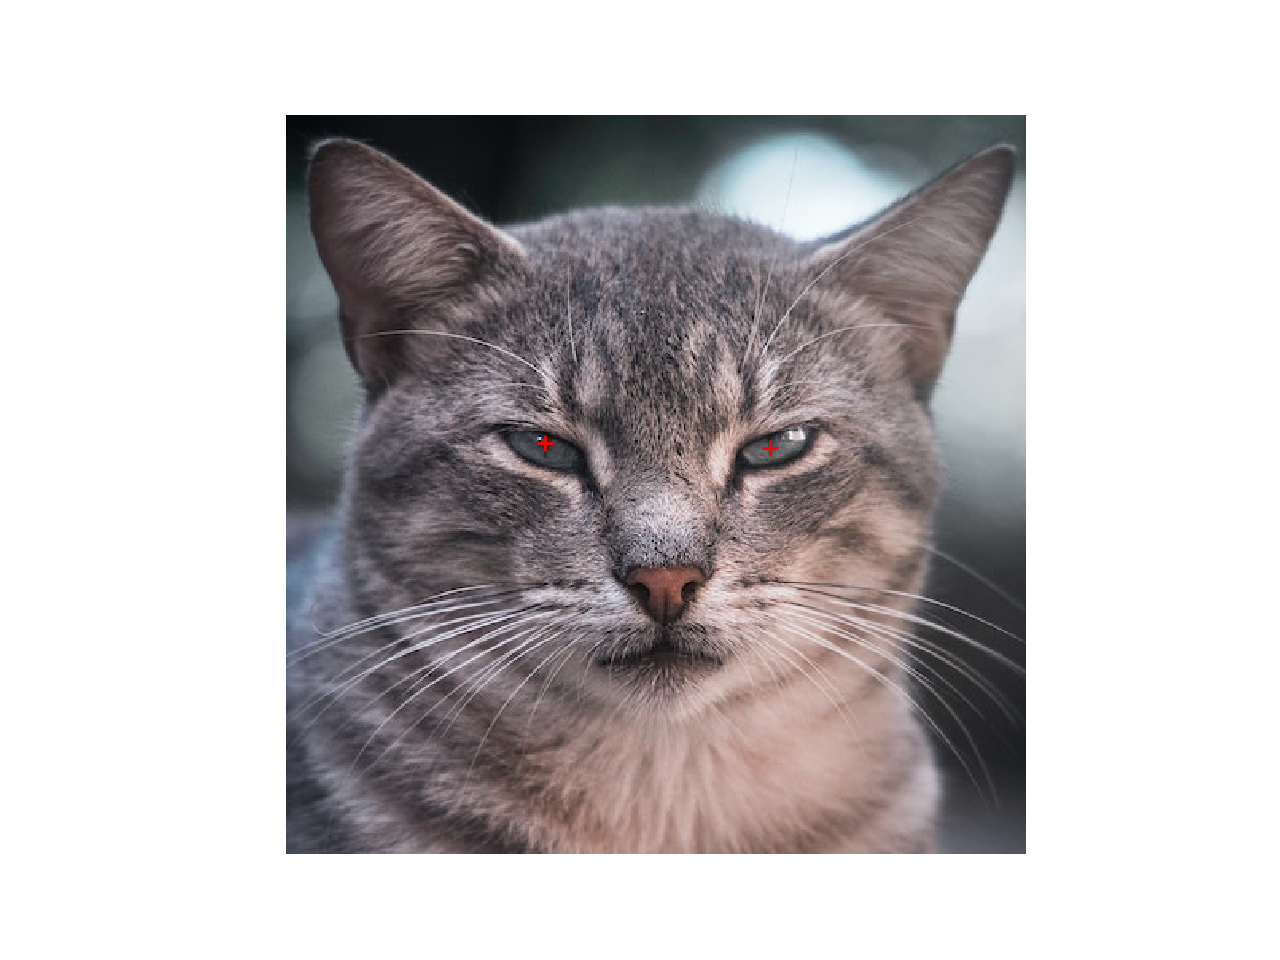

In [14]:
%matplotlib notebook
target_points = specify_points(target_img)

In [21]:
print(source_points)
print(target_points)

[[168. 226.]
 [286. 226.]
 [  0.   0.]
 [  0. 464.]
 [464.   0.]
 [464. 464.]]
[[162. 206.]
 [304. 209.]
 [  0.   0.]
 [  0. 464.]
 [464.   0.]
 [464. 464.]]


In [22]:
# Add the points at the corners of the images
source_points.extend([[0, 0], [0, W-1], [H-1, 0], [H-1, W-1]])
target_points.extend([[0, 0], [0, W-1], [H-1, 0], [H-1, W-1]])
assert len(source_points) == len(target_points)

AttributeError: 'numpy.ndarray' object has no attribute 'extend'

<IPython.core.display.Javascript object>


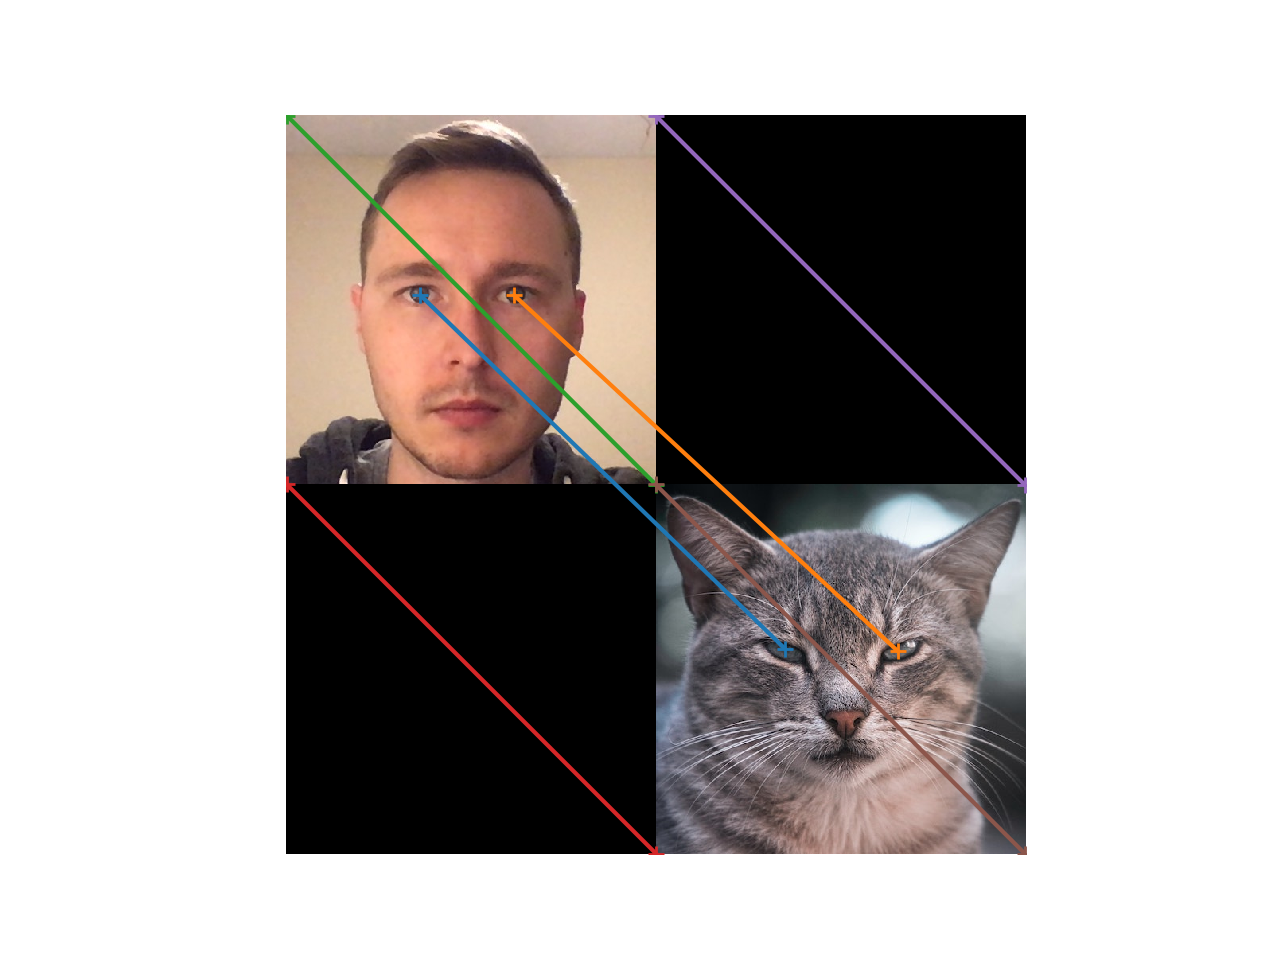

In [24]:
# Display the connected points to verify
mapping_img = np.zeros(shape=(2 * H, 2 * W, C), dtype='uint16')
for h in range(0, H):
    for w in range(0, W):
        for c in range(0, C):
            mapping_img[h][w][c] = source_img[h][w][c]
            mapping_img[h+H][w+W][c] = target_img[h][w][c]

fig = plt.figure()
plt.axis('off')
plt.imshow(cv2.cvtColor(mapping_img, cv2.COLOR_BGR2RGB))

for p in range(0, len(source_points)):
    x1 = source_points[p][0]
    y1 = source_points[p][1]
    x2 = target_points[p][0] + W
    y2 = target_points[p][1] + H
    plt.plot([x1, x2], [y1, y2], marker = '+')

## Compute Delaunay Triangulation

In [25]:
source_triangulation = Delaunay(source_points)
target_triangulation = Delaunay(target_points)

print(source_triangulation.simplices)

[[4 1 2]
 [1 5 3]
 [5 1 4]
 [0 3 2]
 [1 0 2]
 [0 1 3]]


In [51]:
def plot_triangulation(img, points, triangulation):
    fig = plt.figure()
    v = Voronoi(points)
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.triplot(points[:,0], points[:,1], triangulation.simplices.copy(), c='#FF0000')
    plt.plot(points[:,0], points[:,1], 'r+')

<IPython.core.display.Javascript object>


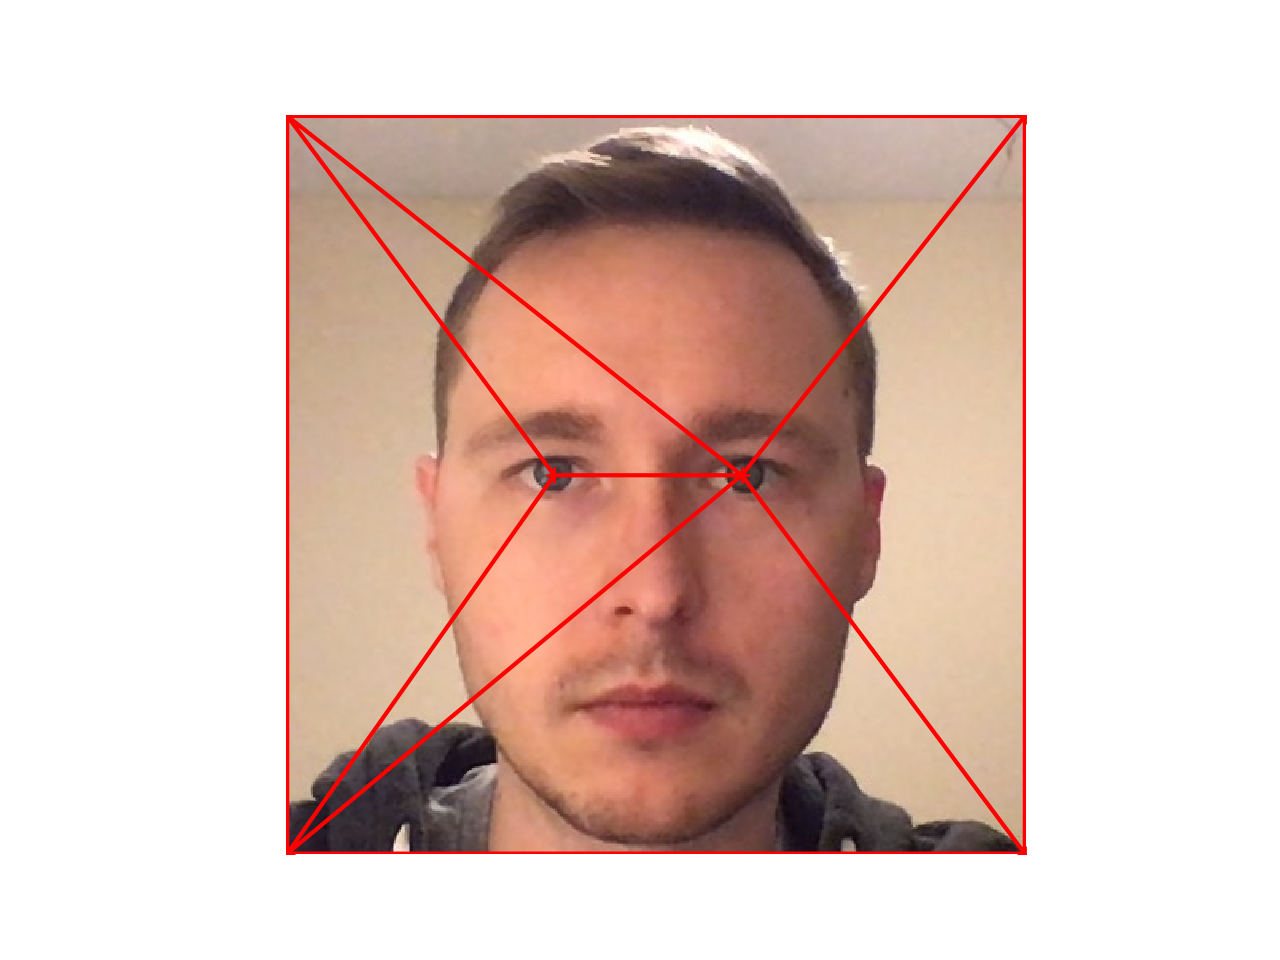

<IPython.core.display.Javascript object>


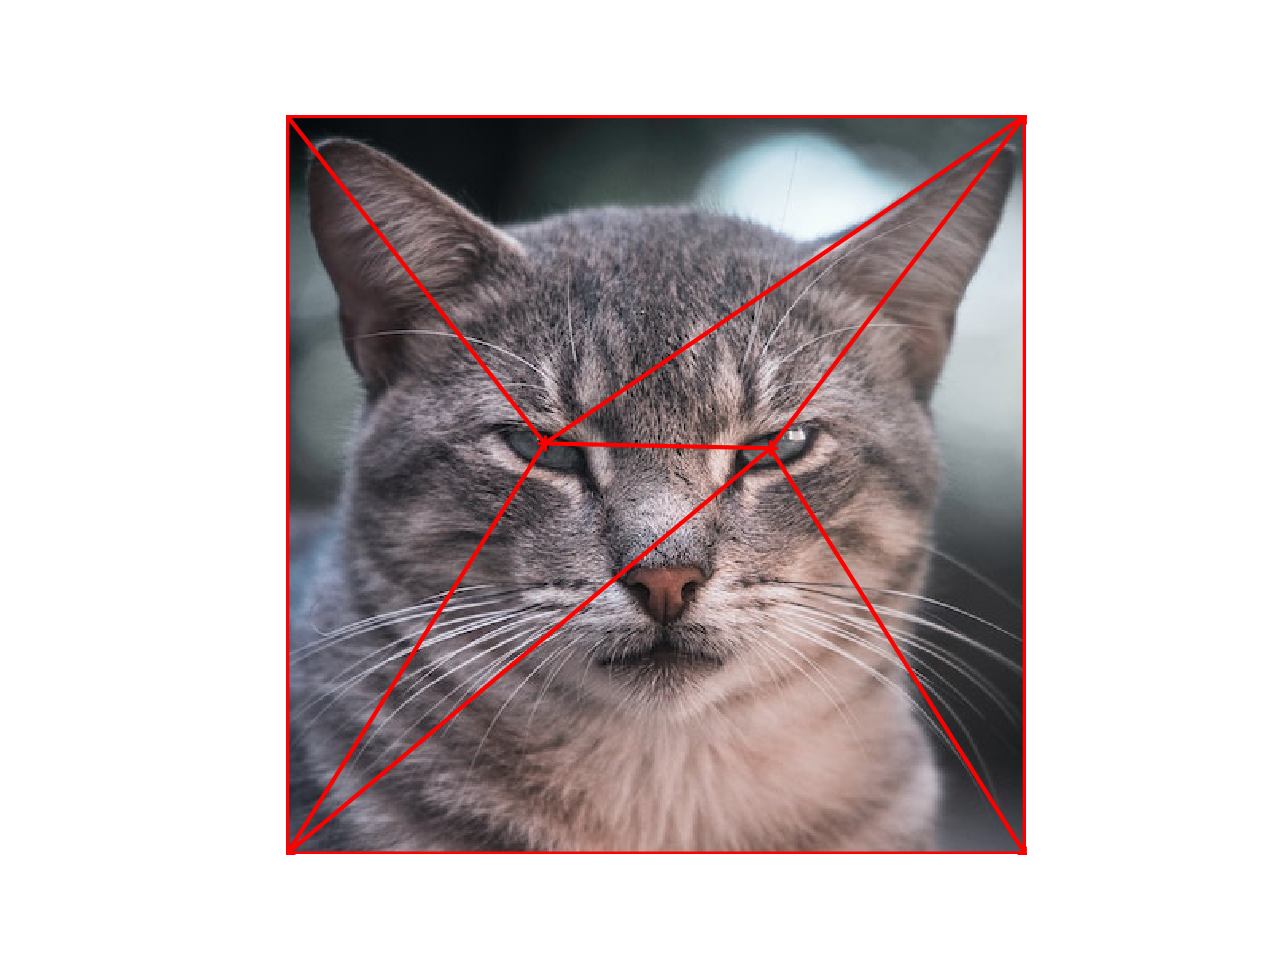

In [52]:
source_points = np.array(source_points)
target_points = np.array(target_points)

plot_triangulation(source_img, source_points, source_triangulation)
plot_triangulation(target_img, target_points, target_triangulation)